This example shows the basic functionality to read data download from the Internatinal Soil Moisture Network (ISMN).
The data is accessible at `www.ismn.geo.tuwien.ac.at` after registration.

The class for reading is called `IsmnNetworks`. It provides functions to access single networks, stations and sensors and the measured time series for each sensor. The `IsmnNetworks` class takes either the root directory where the extracted ISMN files are, or a zip archive of the data directly (reading from zip is significantly slower).

In [1]:
from ismn.interface import ISMN_Interface

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Enter the path to your ISMN data
path_to_ismn_data = r"D:\data-read\ISMN\global_20191024"

The following command will initialise the reader. The first time this is done, metadata for each sensor will we collected. This will iterate through all files and detect e.g. station names, time coverage, measurement depths etc. Metadata collection can take a few minutes and will start multiple parallel processes. By default the `python_metadata` folder will be placed in the passed root directory. The next time the reader is created it will use the `python_metadata` instead of generating it.

You can define a different path, where the metadata is stored, resp. looked for by passing a `meta_path`. You can also define a list of network names that are considered when reading the data (this will not affect metadata generation). Passsing `keep_loaded_data=True` means that all time series, once read, will be kept in memory for faster subsequent access. This can fill up your memory and is only recommended for smal data samples.

Found existing ismn metadata in D:\data-read\ISMN\global_20191024\python_metadata\global_20191024.csv.


h:\code\ismn\src\ismn\interface.py:65: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  networks=network, temp_root=temp_root)


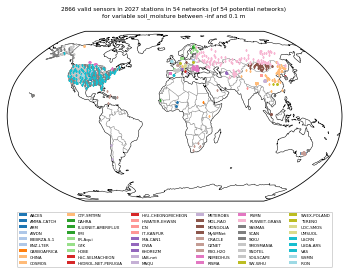

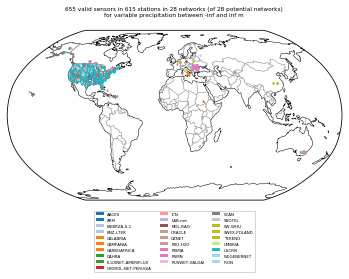

In [2]:
ismn_data = ISMN_Interface(path_to_ismn_data)

#plot available station on a map
fig1, ax1, counts1 = ismn_data.plot_station_locations(variable='soil_moisture', max_depth=0.1)
fig2, ax2, counts2 = ismn_data.plot_station_locations(variable='precipitation')
plt.show()

Next we explore the available networks and stations and select a random network and station to plot data from. The active networks for the collection are:

In [3]:
ismn_data.networks

{'AACES': Network AACES has 49 stations.,
 'AMMA-CATCH': Network AMMA-CATCH has 7 stations.,
 'ARM': Network ARM has 29 stations.,
 'AWDN': Network AWDN has 50 stations.,
 'BIEBRZA-S-1': Network BIEBRZA-S-1 has 30 stations.,
 'BNZ-LTER': Network BNZ-LTER has 12 stations.,
 'CALABRIA': Network CALABRIA has 5 stations.,
 'CAMPANIA': Network CAMPANIA has 2 stations.,
 'CARBOAFRICA': Network CARBOAFRICA has 1 stations.,
 'CHINA': Network CHINA has 40 stations.,
 'COSMOS': Network COSMOS has 108 stations.,
 'CTP-SMTMN': Network CTP-SMTMN has 57 stations.,
 'DAHRA': Network DAHRA has 1 stations.,
 'FLUXNET-AMERIFLUX': Network FLUXNET-AMERIFLUX has 2 stations.,
 'FMI': Network FMI has 27 stations.,
 'FR-Aqui': Network FR-Aqui has 5 stations.,
 'GTK': Network GTK has 7 stations.,
 'HOBE': Network HOBE has 32 stations.,
 'HSC-SELMACHEON': Network HSC-SELMACHEON has 1 stations.,
 'HYDROL-NET-PERUGIA': Network HYDROL-NET-PERUGIA has 2 stations.,
 'HYU-CHEONGMICHEON': Network HYU-CHEONGMICHEON has

A single network from the collection can be accessed via its name.

In [8]:
nw_name = np.random.choice(list(ismn_data.networks.keys()))
network = ismn_data.networks[nw_name]
network

Network RUSWET-GRASS has 119 stations.

A network consists of multiple stations, multiple variables can be measured by different sensors at a station:

In [10]:
station_name = np.random.choice(list(network.stations.keys()))
station = network.stations[station_name]
station

variables = station.get_variables()
print(f"Station '{station.name.upper()}' at Lat: {station.lat}, Lon: {station.lon} measures: {variables}")


Station 'KEMEROVO' at Lat: 55.38, Lon: 86.07 measures: ['soil_moisture']


Accessing sensors at a station works similar to accessing stations in a network:

In [6]:
sensor_name = np.random.choice(list(station.sensors.keys()))
sensor = station[sensor_name]
sensor

variables = station.get_variables()
print(f"Station '{station.name.upper()}' at Lat: {station.lat}, Lon: {station.lon} measures: {variables}")



#to make sure the selected variable is not measured
#by different sensors at the same depths
#we also select the first depth and the first sensor
#even if there is only one
depths_from,depths_to = station_obj.get_depths(variables[0])

sensors = station_obj.get_sensors(variables[0],depths_from[0],depths_to[0])

#read the data of the variable, depth, sensor combination
time_series = station_obj.read_variable(variables[0],depth_from=depths_from[0],depth_to=depths_to[0],sensor=sensors[0])

#print information about the selected time series
print "Selected time series is:"
print time_series


SyntaxError: Missing parentheses in call to 'print'. Did you mean print("Selected time series is:")? (<ipython-input-6-b0aa6adbcb86>, line 13)

In [ ]:
#plot the data
time_series.plot()
plt.legend()
plt.show()


In [ ]:
#we also want to see soil moisture
sm_depht_from,sm_depht_to = station_obj.get_depths('soil moisture')
print sm_depht_from,sm_depht_to


In [ ]:
#read sm data measured in first layer 0.2-0.2m
sm = station_obj.read_variable('soil moisture',depth_from=0.2,depth_to=0.2)
sm.plot()
plt.show()


In [ ]:
# the data attribute is a pandas.DataFrame
time_series.data